# **Importare le librerie**

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('always')
warnings.simplefilter(action='ignore', category=FutureWarning)
print("\n \n \033[1m Librerie importate! \033[0m")

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string



 
  Librerie importate! 


# **Lettura dei dati**

In [2]:
features = ['age', 'sex', 'cp', 'trtbps', 'chol','thalachh', 'exng','fbs', 'output']
#columns= ['età', 'sesso', 'dolore al petto','pressione sanguigna','colesterolo','elettrocardiogramma','frequenza cardiaca','angina','zuccheri nel sangue','infarto']
data=pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv", skipinitialspace=True,usecols= features)
data

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,output
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1
...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,123,1,0
299,45,1,3,110,264,0,132,0,0
300,68,1,0,144,193,1,141,0,0
301,57,1,0,130,131,0,115,1,0


* **Age** = Età
* **Sex** = Sesso (0 per il sesso femminile, 1 per il sesso maschile)
* **Cp** = Chest Pain (dolore al petto, scala che varia da 0 a 3)
* **Trtbps** = Pressione sanguigna a riposo
* **Chol** = Colesterolo
* **Fbs** = Fasting Blood Sugar (livello di zuccheri nel sangue, 0 se non supera i 120 mg/dl, 1 altrimenti)
* **Thalachh** = Frequenza cardiaca massima
* **Exng** = Angina indotta dall'esercizio fisico (dolore al torace)
* **Output** = Attacco di cuore


# **Bilanciamento dei dati**

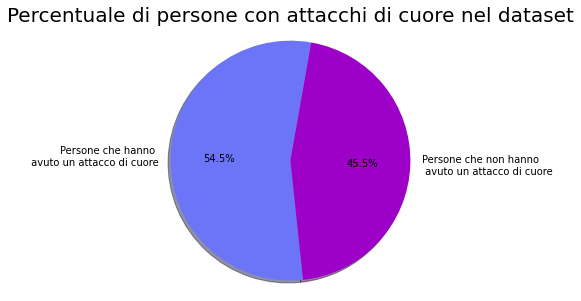

In [3]:
heart=Counter(data['output'])
classes=[]
count=[]   #list to store no of laels of each class
for i in heart.keys():
    classes.append(i)
    count.append(heart[i])
colors = ["#6C74F7", "#9D00C7"]
labels = ['Persone che hanno \n avuto un attacco di cuore', 'Persone che non hanno \n avuto un attacco di cuore']

plt.pie(
    count,
    labels = labels,
    shadow = True,
    colors = colors,
    startangle=80,
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.tight_layout()
plt.title("Percentuale di persone con attacchi di cuore nel dataset", fontsize=20)
plt.show()

Il grafico a torta mostra che il 54% delle persone nel dataset hanno avuto un infarto, mentre il restante 45% no, quindi i dati sono piuttosto bilanciati.

# **Distribuzione delle features**

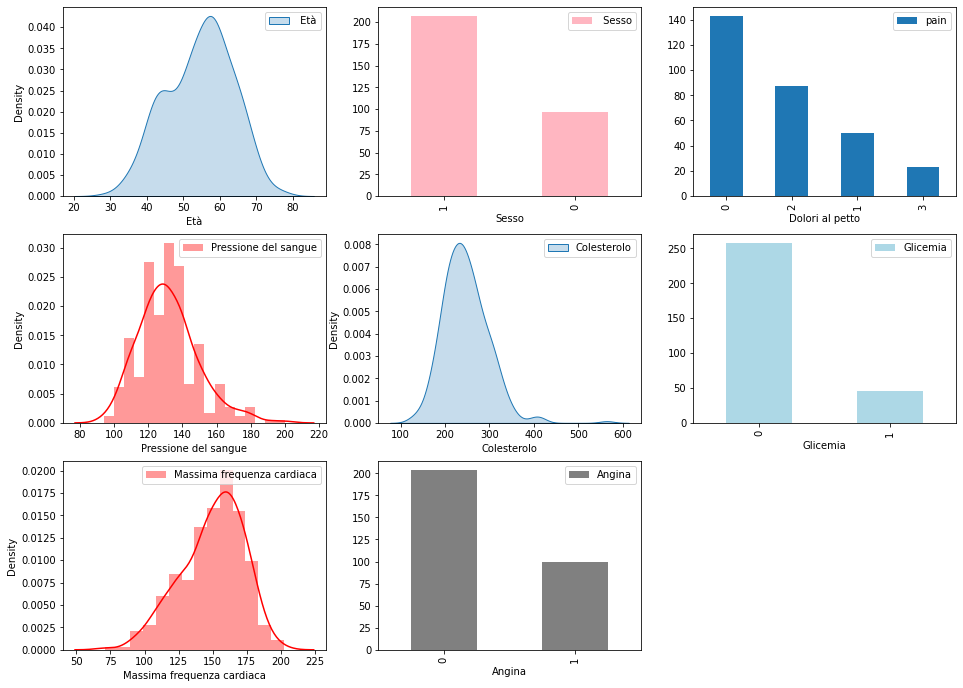

In [4]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(431)
sns.kdeplot(data['age'],shade=True,label=' Età')
# plt.title ('Distribuzione dell'età')
plt.xlabel('Età')
plt.legend()
fig = plt.subplot(432)
data['sex'].value_counts().plot(kind='bar',label=' Sesso', color="lightpink")
plt.xlabel('Sesso')
# plt.title ('Distribuzione dei sessi')
plt.legend()
fig = plt.subplot(433)
data['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('Dolori al petto')
# plt.title ('Distribuzione del dolore al petto')
plt.legend()
fig = plt.subplot(434)
# sns.kdeplot(data['trtbps'],shade=True,label='blood pressure')
sns.distplot(data['trtbps'], color="red",  kde= True,label='Pressione del sangue')
plt.xlabel ('Pressione del sangue')
plt.legend()
fig = plt.subplot(435)
sns.kdeplot(data['chol'],shade=True,label='Colesterolo')
# plt.title ('Distribuzione del colesterolo')
plt.xlabel('Colesterolo')
plt.legend()
fig = plt.subplot(436)
data['fbs'].value_counts().plot(kind='bar',label='Glicemia', color="lightblue")
plt.xlabel('Glicemia')
# plt.title ('Distribuzione della glicemia')
plt.legend()
fig = plt.subplot(437)
# sns.kdeplot(data['thalachh'],shade=True,label='Massima frequenza cardiaca')
sns.distplot(data['thalachh'], color="red",  kde= True,label='Massima frequenza cardiaca')
plt.xlabel('Massima frequenza cardiaca')
plt.legend()
fig = plt.subplot(438)
data['exng'].value_counts().plot(kind='bar',label='Angina', color="grey")
plt.xlabel('Angina')
# plt.title ('Distribuzione dell'angina (dolore al torace)')
plt.legend()

I grafici mostrano come sono distribuite le caratteristiche tra le persone nel dataset.

# Correlazione tra alcune features e infarti 

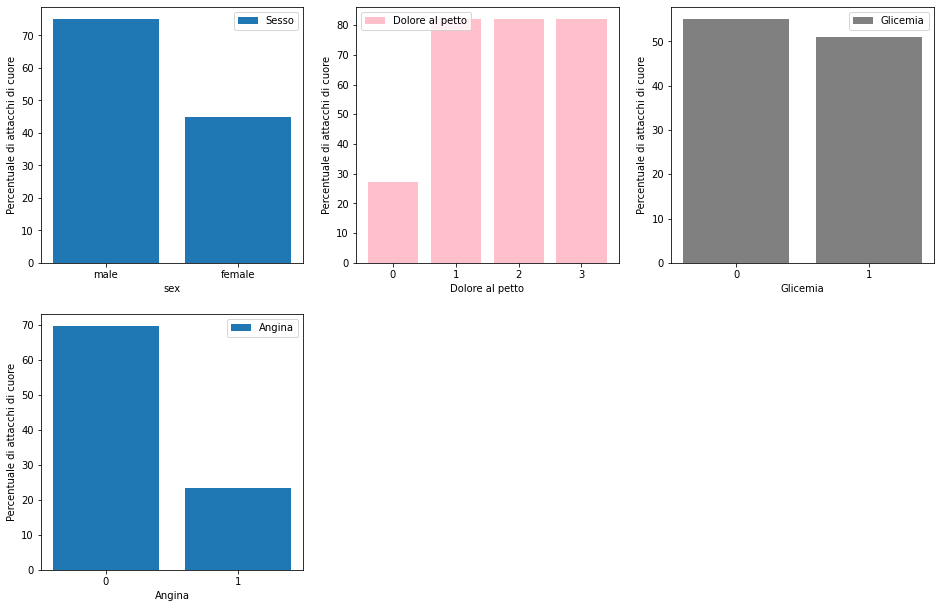

In [5]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(331)
df=data
name='sex'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["male","female"]
plt.bar(x,l,label='Sesso' )
plt.xlabel(name)
plt.ylabel('Percentuale di attacchi di cuore')
plt.legend()
fig = plt.subplot(332)
df=data
name='cp'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='Dolore al petto' , color="pink")
plt.xlabel("Dolore al petto")
plt.ylabel('Percentuale di attacchi di cuore')
plt.legend()

fig = plt.subplot(333)
name='fbs'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='Glicemia', color="grey" )
plt.xlabel('Glicemia')
plt.ylabel('Percentuale di attacchi di cuore')
plt.legend()
fig = plt.subplot(334)
name='exng'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='Angina' )
plt.xlabel('Angina')
plt.ylabel('Percentuale di attacchi di cuore')
plt.legend()

Tra queste features è importante soffermarsi sul dolore al petto, infatti si puó notare come all'aumentare di questo valore, aumenta la probabilità di avere un attacco di cuore.

# Features nel dettaglio 

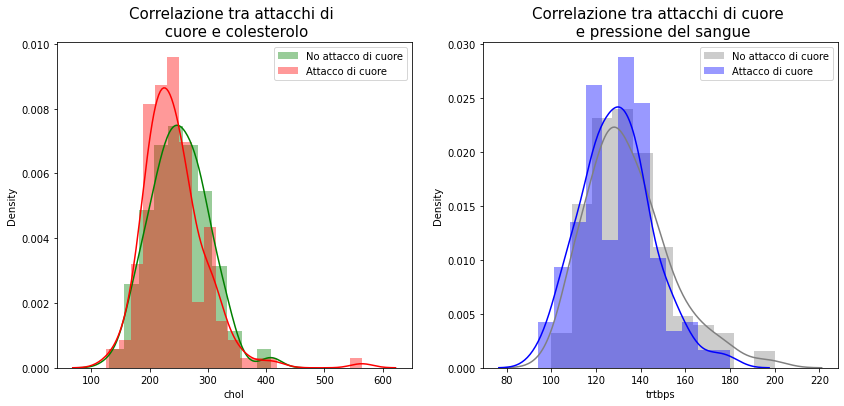

In [6]:
fig=plt.figure(figsize=(14, 6))
fig = plt.subplot(121)
sns.distplot(data[data['output'] == 0]["chol"], color='green',label='No attacco di cuore') 
sns.distplot(data[data['output'] == 1]["chol"], color='red',label='Attacco di cuore') 
plt.title('Correlazione tra attacchi di \n cuore e colesterolo', fontsize=15)
plt.legend()
fig = plt.subplot(122)
sns.distplot(data[data['output'] == 0]["trtbps"], color='grey',label='No attacco di cuore') 
sns.distplot(data[data['output'] == 1]["trtbps"], color='blue',label='Attacco di cuore') 
plt.title('Correlazione tra attacchi di cuore \n e pressione del sangue', fontsize=15)
plt.legend()
warnings.filterwarnings('always')

In particolare in questa sezione ci siamo soffermati sul colesterolo e sulla pressione del sangue.
Le persone che hanno il colesterolo tra 120 e 250 sono più propense ad avere un infarto. 
Si può fare lo stesso discorso per la pressione sanguigna, infatti chi ha dei valori tra 110 e 140 è più probabile che soffra di attacchi di cuore.

In [7]:

heart = data[data['output']==1]['age'].fillna(0.0).astype(float)
heart_no = data[data['output']==0]['age'].fillna(0.0).astype(float)
fi = ff.create_distplot([heart, heart_no], ['Attacco di cuore','Senza attacco di cuore'], bin_size=0.65, curve_type='normal'
                        ,colors =  ['#E50914','#221F1F'])
fi.update_layout(
    title="Correlazione tra attacchi di cuore e all'età",
    xaxis_title="Età",
)
fi.show()
heart = data[data['output']==1]['thalachh'].fillna(0.0).astype(float)
heart_no = data[data['output']==0]['thalachh'].fillna(0.0).astype(float)
fi = ff.create_distplot([heart, heart_no], ['Attacco di cuore','Senza attacco di cuore'], bin_size=0.65, curve_type='normal'
                        ,colors =  ['#E50914','green'])
fi.update_layout(
    title="Correlazione tra attacchi di cuore e massima frequenza cardiaca",
    xaxis_title="Massima frequenza cardiaca",
)
fi.show()

Ancora nel dettaglio guardiamo la correlazione tra attacchi di cuore ed età. Le persone che hanno età tra i 40 e i 70 è più probabile che abbiano un infarto.
Essenzialmente il secondo grafico ci dice che all’aumentare della frequenza cardiaca, aumenta la probabilità di avere un attacco di cuore, in particolare se supera i 140.

# Combinazione di features che rafforza la correlazione

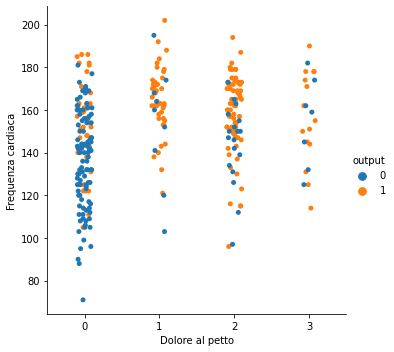

In [8]:
fig = sns.catplot(x="cp", y="thalachh",hue='output', data=data)
fig.set_axis_labels('Dolore al petto','Frequenza cardiaca')

Qui in particolare possiamo vedere come all’aumentare del dolore del petto e della frequenza cardiaca, le probabilità di un infarto aumentano sensibilmente.

# In conclusione

Ci sono features che condizionano di piu la probablità di avere un infarto, tra cui il dolore al petto, la frequenza cardiaca, il colesterolo, l'età e la pressione del sangue, quindi sono fattori da tenere in considerazione in maniera più cauta se si vuole evitare un attacco di cuore.